<img style="float: left; margin: 30px 15px 15px 15px;" src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTFzQj91sOlkeDFkg5HDbjtR4QJYmLXkfMNig&usqp=CAU" width="300" height="400" /> 
       
### <font color='navy'> Simulación matemática. 
    
### Proyecto Módulo 3

<br> 
    
**Nombres:**
    
Sindy Citlali Sánchez Ponce\
Carolina Anidsel Casillas García\
María del Carmen Martínez Hernández    
    
**Fecha:** 16 de noviembre de 2022.
    
**Profesor:** Oscar David Jaramillo Zuluaga.
    
**Link Github**: https://github.com/MMHdez/PM3_MartinezM1_SanchezS2_CasillasC3

## 1.1 Viajes espaciales: lanzamiento de un cohete

### 1.2 Introducción
> Las ecuaciones diferenciales son expresiones conformadas por una funcion desconocida y sus derivadas. Una de las formas de clasificación es según su número de variables independientes. Cuando se trata de una, se le conoce como Ecuación Diferencial Ordinaria (EDO), asimismo, a partir de dos, se le denomina Ecuación Diferencial Parcial (EDP) (Chapra, 2015).
Otra manera de clasificarlas es según su orden, es decir, el grado de la derivada mayor. 
Tal como se muestra a continuación:

___Ecuación de primer orden:___

### $$\frac{d}{dx}=P(x)y+Q(x)$$


___Ecuación de primer orden:___

 ### $$\frac{dy^2}{dx^2}=e^x+3x\sin{2x}$$


___Ecuación de orden n:___

###  $$\frac{dy^n}{dx^n}=P(x)+Q(x)e^x$$

> Las ecuaciones diferenciales son de gran utilidad porque son capaces de modelar problemas físicos que ocurren en la vida real. Muchas de las ecuaciones diferenciales más famosas fueron elaboradas por el físico inglés Isaac Newon, quien además creó las leyes que ayudan a explicar diversos fenómenos. Entre ellas se encuentra la Segunda Ley de Newton, la cual trata acerca de la relación proporcional entre la aceleración de un objeto y las fuerzas que actúan sobre él (García, 2018).

> Otra de las leyes relevantes dentro de este contexto es la Tercera Ley de Newton: Conservación del momento lineal, la cual explica la relación acción-reacción que poseen los objetos, puesto que cuando dos objetos interactuan, la fuerza ejercida por el primer objeto sobre el segundo es igual en magnitud y opuesta en dirección a la fuerza que ejerce el segundo objeto sobre el primero (García, 2018).
<br>
Cabe destacar que ambas son ecuaciones diferenciales, siendo la segunda ley de Newton de segundo orden y la tercera ley de primer orden.

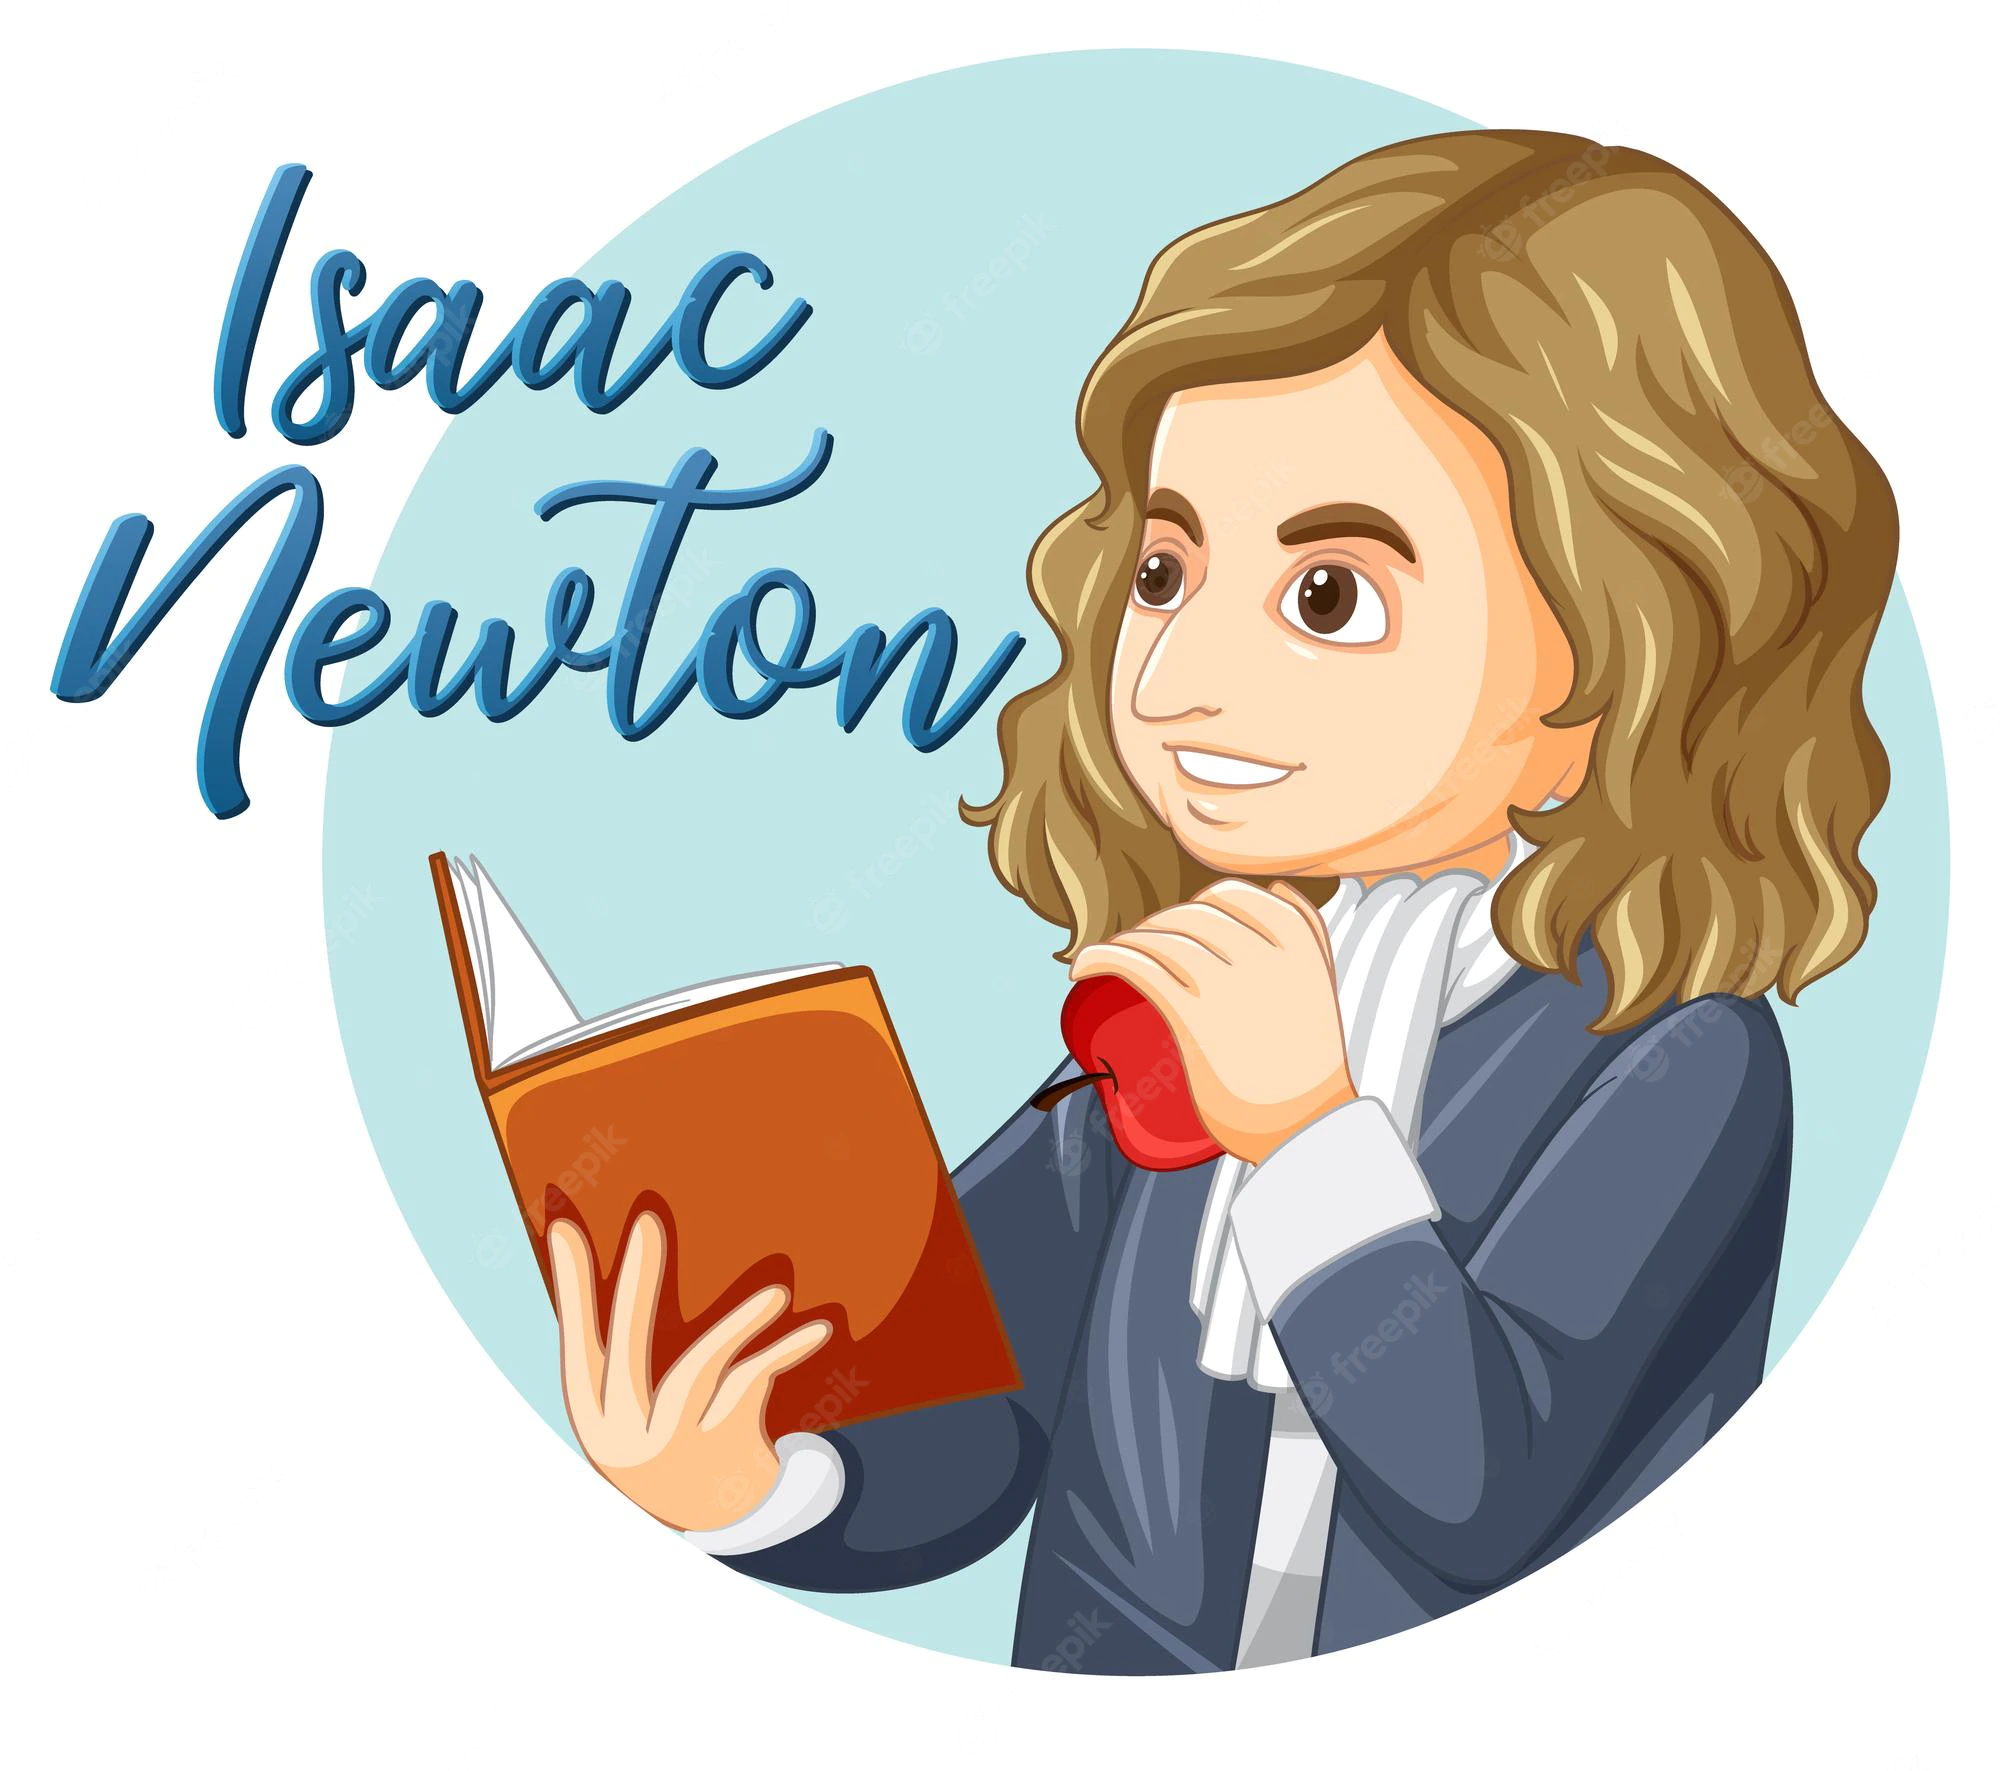

>Actualmente, las aplicaciones de estos conocimientos se encuentran de manera implícita en nuestro quehacer diario, ejemplos de ello son los GPS, la televisión por cable, los modelos matemáticos empleados para el pronóstico del clima y para aproximar las afectaciones de enfermedades virales en una determinada población. Otra de ellas relevantes para el presente proyecto es lanzamientos de cohetes que involucran los viajes espaciales.
Tanto la ecuación de empuje, como la velocidad de escape son expresiones indispensables en el lanzamiento de un cohete. Justo son estos parámetros los que rigen el diseño de los cohetes con la ayuda de la inegniería aerodinámica, empleando una cantidad determinada de combustible con el fin de lograr enviar carga útil fuera del planeta. La clasificación de los cohetes está dada según sus propulsores, ya sea en seire o en paralelo. Los cohetes Saturn V correspondientes a las misiones de Apolo son cohetes en serie, mientras que el transbordador espacial es un cohete paralelo (Viaje Al Cuanto, 2020).

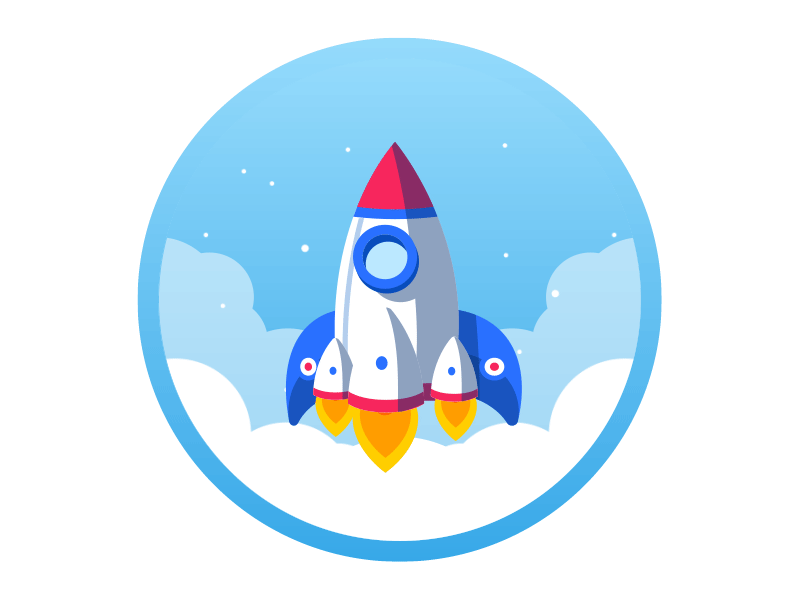

### 1.3 Objetivos.
> #### 1.1 Objetivo general.
> Comprender el planteamiento, modelado y aplicación de las ecuaciones diferenciales necesarias para el lanzamiento de un cohete.

> #### 1.2 Objetivos específicos
>  - Plantear las expresiones para la velocidad de escape y de empuje de un cohete.
>  - Resolver el sistema planteado a patir de las ecuaciones diferenciales.
>  - Graficar el cambio en la posición del cohete con respecto del tiempo.

### 1.4 Modelo que representa el problema.
>Las ecuaciones a utilizar son la tercera ley de Newton, la cual da pie a la ecuación de empuje y la energía mecánica a través de la energía de atracción gravitacional, necesaria para obtener la velocidad de escape:

### $$\Sigma{F}=ma$$
### $$E_m=E_c+U$$
### $$F=\frac{Gm_1m_2}{R^2}$$

>Para la ecuación de Newton, es posible plantear a la aceleración como la derivada de la velocidad con respecto al tiempo, la cual, al mismo tiempo puede plantearse como la derivada de la posición respecto al tiempo, convirtiéndola en una ecuación diferencial de segundo orden. Es decir, 

### $$ Velocidad [v] =  \frac{dx}{dt}  $$


### $$ Aceleración [a] =  \frac{dv}{dt}  = \frac{d^2 x}{dt^2}  $$

>Asimismo, se pueden tomar a la masa y velocidad como variables, puesto que el cohete va perdiendo combustible conforme va avanzando, disminuyendo así su masa. Tomando en cuenta lo anterior, podemos reescribir a la ecuación como:

### $$\Sigma{F}=m\frac{dv}{dt}-uD$$

>Siendo u la velocidad de salida del combustible respecto al cohete y D la masa expulsada respecto al tiempo, ambas son constantes en este punto, asumiendo que los propulsores tienen una misma potencia todo el tiempo.

>Sin embargo, esta sumatoria solo representa las fuerzas del cohete, por lo que además se debe tener en consideracion una tercera fuerza, la fuerza de atracción que ejerce la tierra sobre el cohete, considerando esto, la ecuacion se rescribe como:

### $$\Sigma{F}=m\frac{dv}{dt}=uD-mg$$

>Considerando que la masa actual es la masa inicial menos la masa expulsada, expresándolo como el tiempo multiplicado por D, nuevamente la ecuación se reescribe como:

###  $$\frac{dv}{dt}=u\frac{D}{m_0-Dt}-g$$
### $$\frac{dx^2}{dt^2}=u\frac{D}{m_0-Dt}-g$$

>Es importante hacer hincapie en que en este caso la velocidad representa a nuestra ecuación diferencial de primer orden y la posición del cohete representa a la ecuación diferencial de segundo orden. Sus soluciones analíticas son:

___Ecuación de primer orden:___

###  $$v=v_0+u*ln(\frac{D}{m_0-Dt})-gt$$

___Ecuación de segundo orden:___

### $$x=x_0+v_0t-\frac{gt^2}{2}+ut*ln(m_0)+\frac{u}{D}[(m_0-Dt)ln(m_0-Dt)+Dt-m_0ln(m_0)]$$

>Por otro lado, para calcular la velocidad necesaria para que el cohete pueda salir de la atracción gravitacional de la tierra, se debe calcular la velocidad de escape. Para esto, se utiliza la fórmula de la energía mecánica, la cual es la suma de la energía cinética y potencial. La energía cinética se expresa como:

___Energía Cinética___

###  $$E_c=\frac{1mv^2}{2}$$

___Energía Potencial___

###  $$U=-\int^r_0F*dr$$

>Esta fuerza potencial es variante, sin embargo, para nuestro modelo es posible definir a la energía potencial como:

###  $$U=-\int^r_0\frac{Gm_1m_2}{r^2}dr=-\frac{Gm_1m_2}{r}$$

>Siendo la masa 1 la masa de la tierra, la masa 2 la masa del cohete y r la distancia del radio de la tierra. Tomando a r como cualquier distancia en la que el cohete pueda viajar, pero considerando que en ésta el cohete no es atraído en lo absoluto por la tierra, es decir, se vuelve infinito, la ecuación se simplifica. 

>Una vez calculada tanto la energía potencial como la cinética, ya es posible conocer la velocidad mínima necesaria para que el cohete pueda salir de la gravedad de la tierra, por lo que en este punto, la energía mecánica total es 0, pudiendo despejar la fórmula como:

###  $$\frac{1mv^2}{2}=-\frac{Gm_1m_2}{r}$$

>para así eliminar de la ecuación la masa del cohete y despejar la velocidad, obteniendo la siguiente expresión:

### $$v=\sqrt{\frac{2GM}{r}}$$


In [87]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as ode

In [88]:
# Solución analítica
def posicion(t,v0,x0):
    return x0+(v0*t)-((g/2)*t**2)+u*t*np.log(m0)+(u/Me)*((m0-Me*t)*np.log(m0-Me*t)+Me*t-m0*np.log(m0))

def velocidad(t,v0):
    return v0+u*np.log((m0)/(m0-Me*t))-g*t

In [89]:
# Ecuación diferencial
def ecu_dif(t,a):
    x=a[0]
    v=a[1]
    # Para tener la ecuación de segundo grado se sustituye la primera derivada por un valor
    # al estar midiendo posición y velocidad la primera derivada se define como la velocidad
    dx=v
    # Derivada de la velocidad
    dv=(u*(Me/(m0-(Me*t))))-g
    return [dx,dv]

In [90]:
# Condiciones iniciales y datos termodinámicos [1]
a=[0,0] # Velocidad y posición inicial
u=31935 # Velocidad de salida del combustible respecto al cohete 
m0=549054 # Masa inicial
Me=397 # Masa expulsada respecto al tiempo
g=9.79203 # Gravedad

# Vector de tiempo
t=(0,200)

# Solución
solv=ode.solve_ivp(ecu_dif,t,a,max_step=1)

In [91]:
# Se toman los tiempos que nos dio la solución
t1=solv.t

x=solv.y.T
x1=x[:,1]
x2=x[:,0]

In [92]:
#Mostramos la velocidad mínima de escape en la tierra
vm = np.full(205,11800)

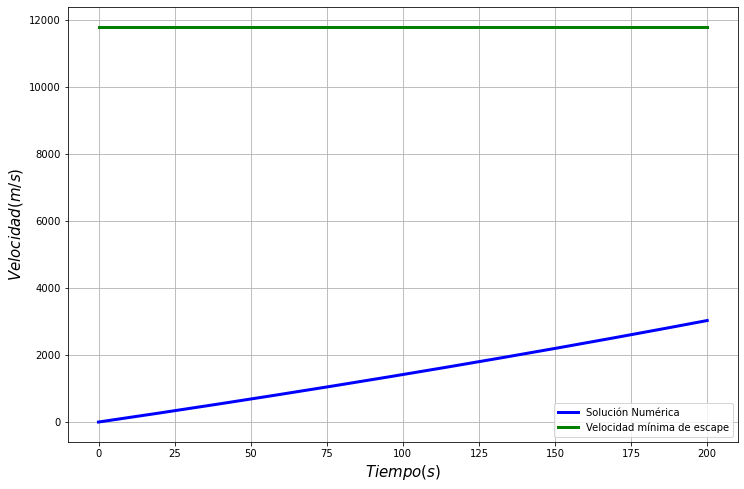

In [93]:
# Gráfica de la solución
plt.figure(figsize=(12,8))
plt.plot(t1,x1,'b',lw=3,label='Solución Numérica')
plt.plot(t1, vm, "-g",lw=3, label = "Velocidad mínima de escape")

plt.xlabel('$Tiempo (s)$',fontsize=15)
plt.ylabel('$Velocidad (m/s)$',fontsize=15)

plt.legend(loc='best')
plt.grid()
plt.show()

### ¿Cómo alcanzar la velocidad de escape mínima?

Cómo se mencionó anteriormente, la velocidad de escape mínima es la velocidad que nos permite escapar de la atraccción de la tierra debido a la gravedad. Para poder alcanzar este número la velocidad de escape de la masa expulsada y la masa expulsade deberán ser lo suficientemente grandes para permitir superar los 11.8 km/s en los primeros segundos del viaje.

Si cambiemos estos parametros para observar cambios en la gráfica.

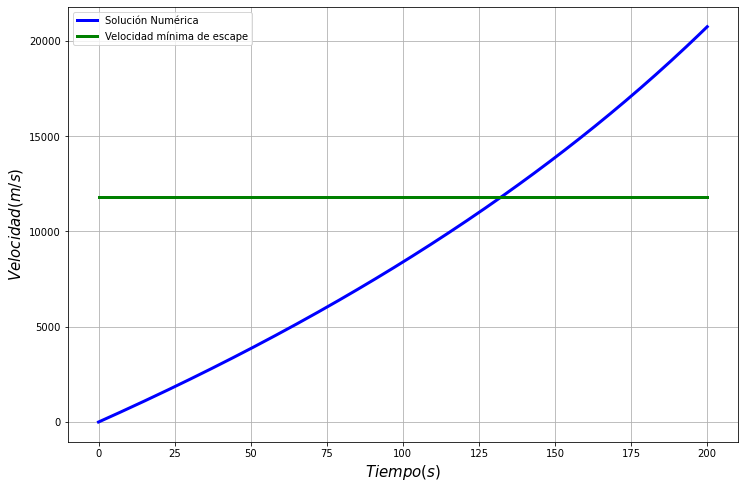

In [98]:
#Solución con diferentes parametros u y Me
Me=1397 
u=31935 

solv=ode.solve_ivp(ecu_dif,t,a,max_step=1)
t1=solv.t
x=solv.y.T

x1=x[:,1]
x2=x[:,0]

# Gráfica de la solución
plt.figure(figsize=(12,8))
plt.plot(t1,x1,'b',lw=3,label='Solución Numérica')
plt.plot(t1, vm, "-g",lw=3, label = "Velocidad mínima de escape")

plt.xlabel('$Tiempo (s)$',fontsize=15)
plt.ylabel('$Velocidad (m/s)$',fontsize=15)

plt.legend(loc='best')
plt.grid()
plt.show()

### Comparación entre solucion analítica y numérica

In [111]:
# Solución analítica con el tiempo de la solución
x1_ana=velocidad(t1,a[1])
x2_ana=posicion(t1,a[1],a[0])

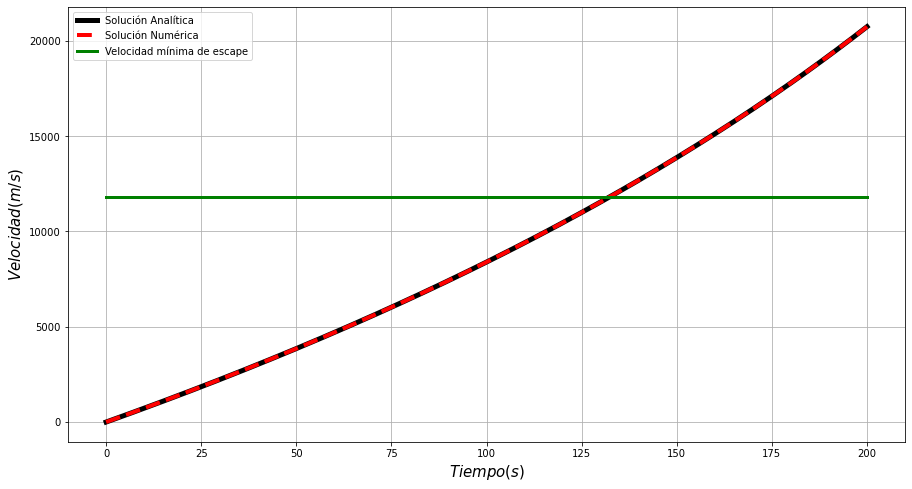

In [101]:
# Gráfica de comparación entre solución numérica y solución analítica
plt.figure(figsize=(15,8))

plt.plot(t1,x1_ana,'k',lw=5,label='Solución Analítica')
plt.plot(t1,x1,'--r',lw=4,label='Solución Numérica')
plt.plot(t1, vm, "-g",lw=3, label = "Velocidad mínima de escape")

plt.xlabel('$Tiempo (s)$',fontsize=15)
plt.ylabel('$Velocidad (m/s)$',fontsize=15)

plt.legend(loc='best')
plt.grid()
plt.show()

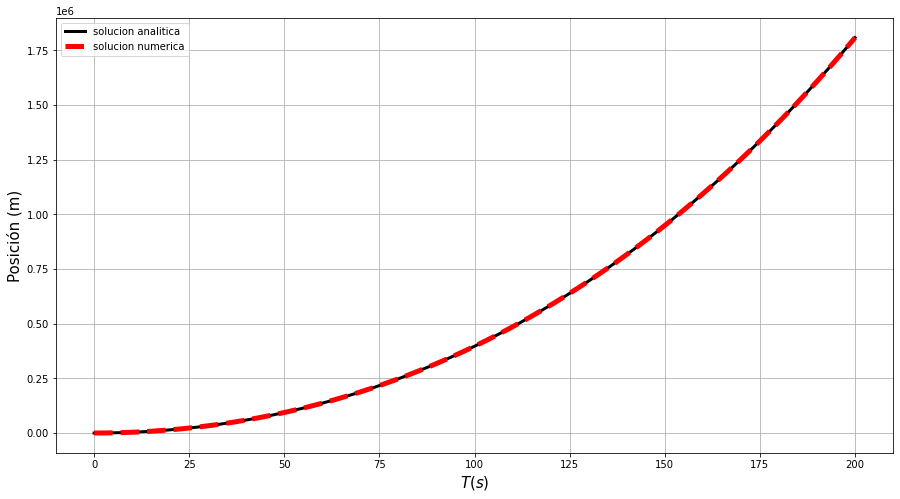

In [105]:
#se grafica la posición respecto al tiempo tanto analitica como numerica
plt.figure(figsize=(15,8))
plt.plot(t1,x2_ana,'k',lw=3,label='solucion analitica')
plt.plot(t1,x2,'--r',lw=5,label='solucion numerica')
plt.xlabel('$T (s)$',fontsize=15)
plt.ylabel('Posición (m)',fontsize=15)
plt.legend(loc='best')
plt.grid()
plt.show()

In [108]:
x1.shape, x1_ana.shape
x1=x1.reshape(len(x1))
x2.shape, x2_ana.shape
x2=x2.reshape(len(x2))
x1.shape, x1_ana.shape, x2.shape, x2_ana.shape

((205,), (205,), (205,), (205,))

In [109]:
# Error de aproximación
error = np.abs(x1-x1_ana)
errorp = np.abs(x2-x2_ana)

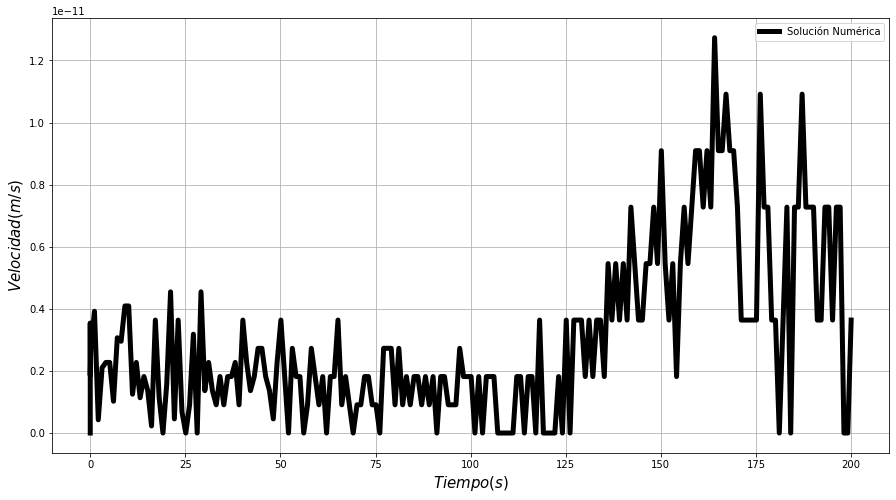

In [104]:
# Gráfica del error
plt.figure(figsize=(15,8))

plt.plot(t1,error,'k',lw=5, label='Solución Numérica')

plt.xlabel('$Tiempo (s)$',fontsize=15)
plt.ylabel('$Velocidad (m/s)$',fontsize=15)

plt.legend(loc='best')
plt.grid()
plt.show()

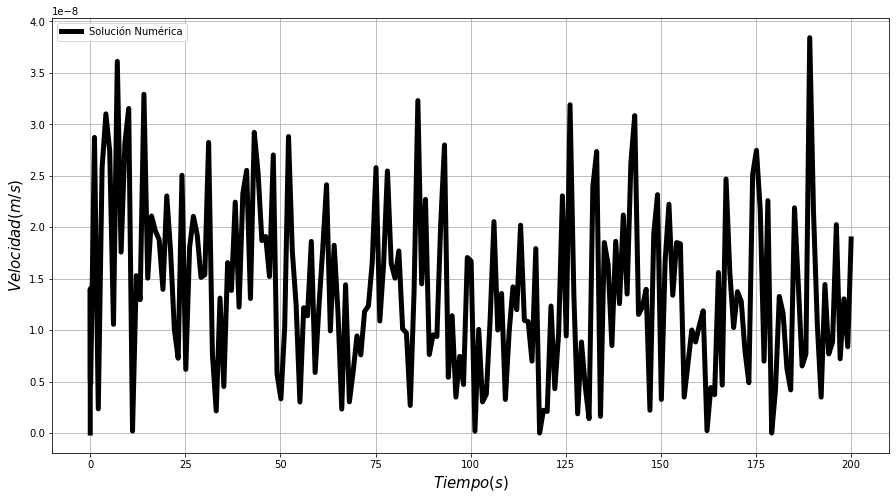

In [110]:
# Gráfica del error
plt.figure(figsize=(15,8))

plt.plot(t1,errorp,'k',lw=5, label='Solución Numérica')

plt.xlabel('$Tiempo (s)$',fontsize=15)
plt.ylabel('$Velocidad (m/s)$',fontsize=15)

plt.legend(loc='best')
plt.grid()
plt.show()

### Salir de la atmosfera desde otros planetas

Hasta el momento hemos alcanzado la velocidad mínima de escape para salir de la tierra al modificar la masa de expulción o la velocidad de esta. Sin embargo, la $vm$ se ha caclulado con el valor de gravedad de la tierra, por lo que si cambiamos este parametro podriamos calcular y calcular la posicion respecto al tiempo del coehete en otros planetas o astros, por ejemplo la luna.

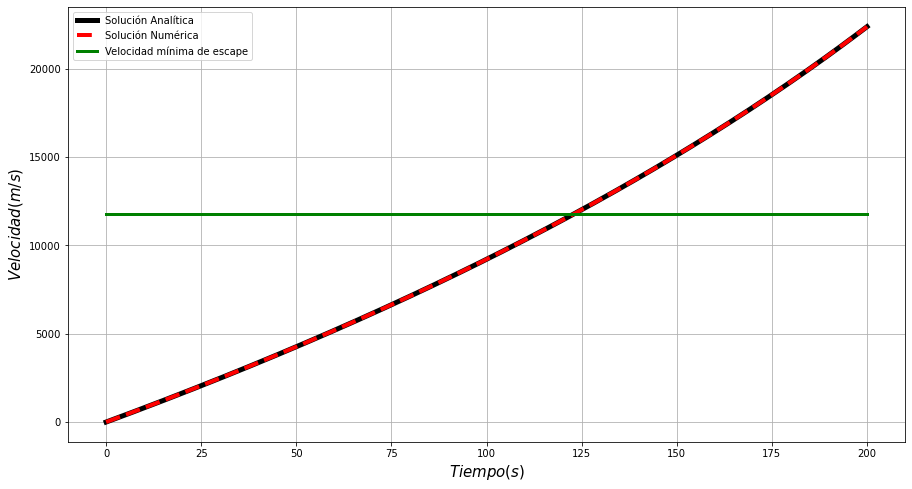

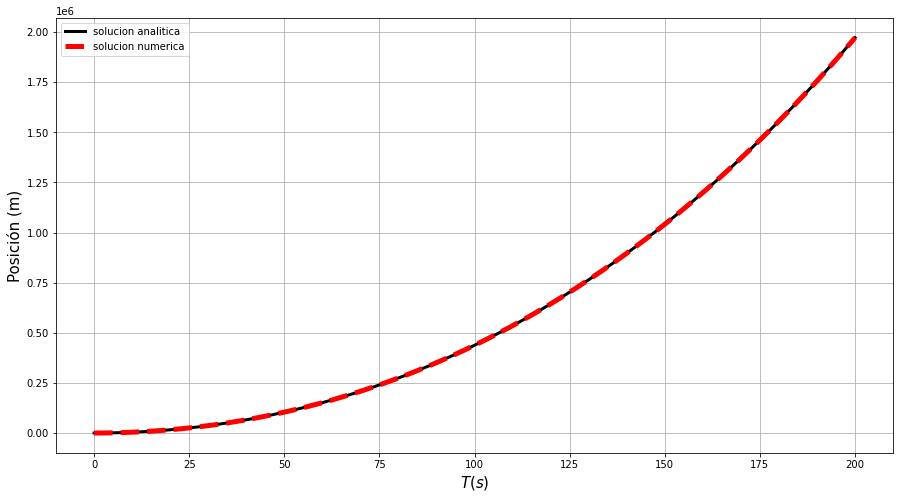

In [113]:
#solución con la gravedad de la luna
g=1.62 # Gravedad de la luna

solv=ode.solve_ivp(ecu_dif,t,a,max_step=1)
t1=solv.t
x=solv.y.T

x1=x[:,1]
x2=x[:,0]

x1_ana=velocidad(t1,a[1])
x2_ana=posicion(t1,a[1],a[0])

plt.figure(figsize=(15,8))

plt.plot(t1,x1_ana,'k',lw=5,label='Solución Analítica')
plt.plot(t1,x1,'--r',lw=4,label='Solución Numérica')
plt.plot(t1, vm, "-g",lw=3, label = "Velocidad mínima de escape en la tierra")

plt.xlabel('$Tiempo (s)$',fontsize=15)
plt.ylabel('$Velocidad (m/s)$',fontsize=15)

plt.legend(loc='best')
plt.grid()
plt.show()

plt.figure(figsize=(15,8))
plt.plot(t1,x2_ana,'k',lw=3,label='solucion analitica')
plt.plot(t1,x2,'--r',lw=5,label='solucion numerica')
plt.xlabel('$T (s)$',fontsize=15)
plt.ylabel('Posición (m)',fontsize=15)
plt.legend(loc='best')
plt.grid()
plt.show()

### 1.8 Referencias.

> - Falcon 9. (n.d.). SpaceX. https://www.spacex.com/vehicles/falcon-9/
> - Chapra, S. (2015). Métodos numéricos para ingenieros (7.a ed.). Editorial McGraw-Hill
> - García, E. (2018). ECUACIONES DIFERENCIALES. UNIVERSIDAD AUTÓNOMA DEL ESTADO DE HIDALGO. https://www.uaeh.edu.mx/docencia/P_Presentaciones/zimapan/ingenieria_en_procesamiento_de_recursos_minerales/2018/ecuaciones_diferenciales.pdf
> - Serway, R. A. (2018). Fisica para ciencias e ingenieria 1 (10.a ed.). CENGAGE LEARNING.
> - Viaje Al Cuanto. (2020, 17 mayo). Ciencia de cohetes. YouTube. https://www.youtube.com/watch?v=N2MHn8LtFOc&t=428s